In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
import numpy as np
import scipy
from sklearn import preprocessing
from scipy.stats import pearsonr, spearmanr
from scipy.stats import t
from scipy import stats

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

### **1. Загрузим файл auto.csv**

In [105]:
df = pd.read_csv('auto.csv')
df.tail(50)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
155,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778
156,0,91,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938
157,0,91,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,7198
158,0,91,toyota,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898
159,0,91,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788
160,0,91,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,38,47,7738
161,0,91,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,28,34,8358
162,0,91,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,28,34,9258
163,1,168,toyota,gas,std,two,sedan,rwd,front,94.5,...,98,2bbl,3.19,3.03,9.0,70,4800,29,34,8058
164,1,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98,2bbl,3.19,3.03,9.0,70,4800,29,34,8238


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    int64  
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

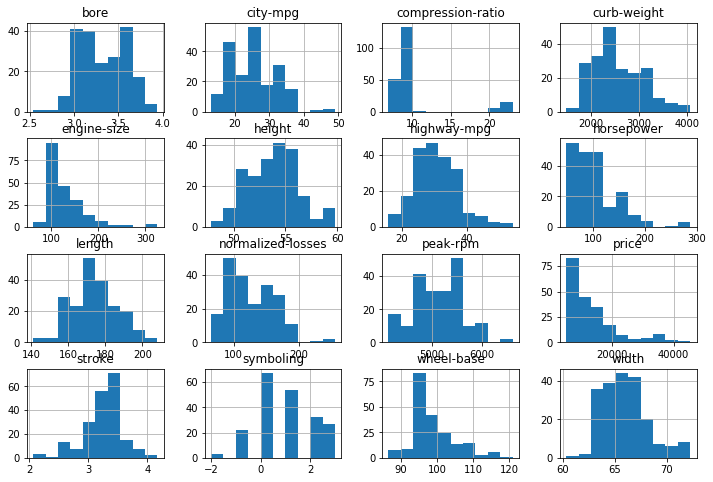

In [8]:
hists = df.hist()

### **2. Рассчитаем основные статистики для переменных(среднее,медиана, мода, мин/макс, сред. отклонение)**

In [10]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
df.mode()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,161.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **3.Рассчитаем и визуализируем корреляционную матрицу для переменных**

In [13]:
matrix_corr = np.round(df.corr(), decimals=2)
matrix_corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.00,0.50,-0.53,-0.36,-0.23,-0.54,-0.23,-0.11,-0.16,-0.02,-0.18,0.07,0.27,-0.04,0.03,-0.08
normalized-losses,0.50,1.00,-0.03,0.05,0.12,-0.33,0.15,0.17,0.01,0.04,-0.15,0.27,0.23,-0.29,-0.26,0.20
wheel-base,-0.53,-0.03,1.00,0.87,0.80,0.59,0.78,0.57,0.50,0.16,0.25,0.30,-0.36,-0.47,-0.54,0.57
length,-0.36,0.05,0.87,1.00,0.84,0.49,0.88,0.68,0.61,0.13,0.16,0.52,-0.28,-0.67,-0.70,0.68
width,-0.23,0.12,0.80,0.84,1.00,0.28,0.87,0.74,0.56,0.18,0.18,0.60,-0.21,-0.64,-0.68,0.76
height,-0.54,-0.33,0.59,0.49,0.28,1.00,0.30,0.07,0.20,-0.04,0.26,-0.11,-0.32,-0.05,-0.11,0.11
curb-weight,-0.23,0.15,0.78,0.88,0.87,0.30,1.00,0.85,0.65,0.17,0.15,0.68,-0.26,-0.76,-0.80,0.84
engine-size,-0.11,0.17,0.57,0.68,0.74,0.07,0.85,1.00,0.60,0.21,0.03,0.74,-0.24,-0.65,-0.68,0.87
bore,-0.16,0.01,0.50,0.61,0.56,0.20,0.65,0.60,1.00,-0.05,0.01,0.54,-0.28,-0.56,-0.56,0.55
stroke,-0.02,0.04,0.16,0.13,0.18,-0.04,0.17,0.21,-0.05,1.00,0.19,0.16,-0.05,-0.03,-0.04,0.08


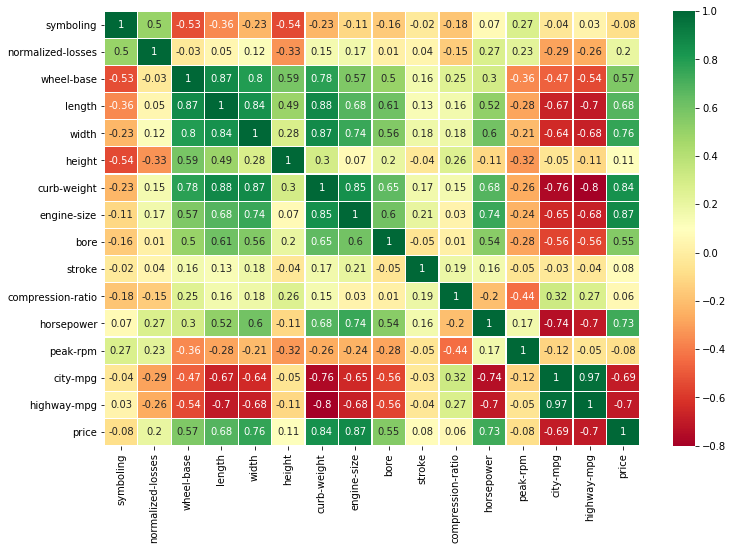

In [14]:
heatmap = sns.heatmap(matrix_corr, annot=True, cmap='RdYlGn', linewidths=0.2)

### **4. Визуализируем распределение переменной ‘Price’, рассчитаем показатели skewness и kurtosis**

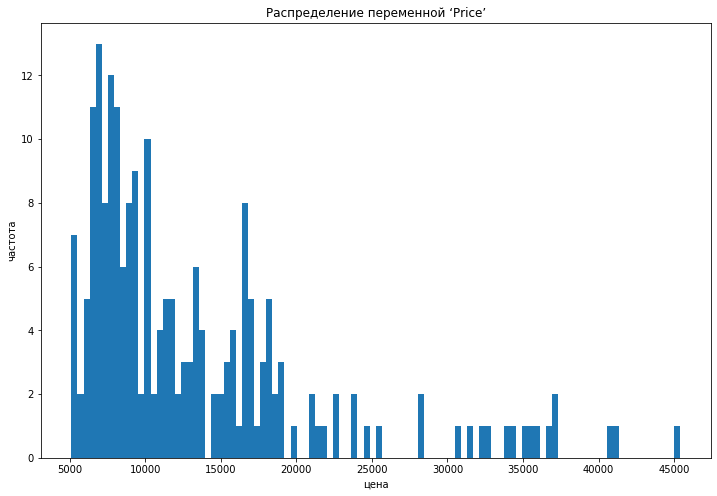

In [20]:
plt.hist(df['price'], 100)
plt.xlabel('цена')
plt.ylabel('частота')
plt.title('Распределение переменной ‘Price’')
plt.show()

In [25]:
skewness = scipy.stats.skew(df['price'], axis=0, bias=True)
skewness

1.7534486514523662

In [27]:
kurtosis = scipy.stats.kurtosis(df['price'], axis=0, fisher=True, bias=True) 
kurtosis

2.848082544390688

### **5. Визуализируем несколько взаимосвязей между переменными**

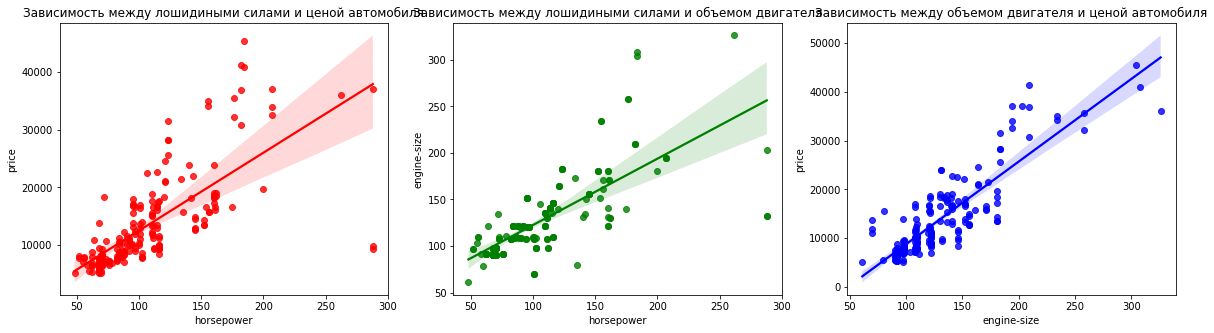

In [38]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.regplot(x=df['horsepower'], y=df['price'], color='r')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.title('Зависимость между лошидиными силами и ценой автомобиля')
plt.subplot(1, 3, 2)
sns.regplot(x=df['horsepower'], y=df['engine-size'], color='g')
plt.xlabel('horsepower')
plt.ylabel('engine-size')
plt.title('Зависимость между лошидиными силами и объемом двигателя')
plt.subplot(1, 3, 3)
sns.regplot(x=df['engine-size'], y=df['price'], color='b')
plt.xlabel('engine-size')
plt.ylabel('price')
plt.title('Зависимость между объемом двигателя и ценой автомобиля')
plt.show()

### ***6. Выдвинуть несколько гипотез по набору имеющихся переменных и проверить эти гипотезы с использованием t-test.***

H0 - средняя цена турбового автомобиля не отличается от цены нетурбовых автомобилей.

In [73]:
turbo = df[df['aspiration'] == 'turbo']['price']
not_turbo = df[df['aspiration'] == 'std']['price']

In [74]:
stats.ttest_ind(turbo, not_turbo)

Ttest_indResult(statistic=2.648853921594821, pvalue=0.008711812005312373)

In [75]:
statistics.mean(turbo)

16460.756756756757

In [76]:
statistics.mean(not_turbo)

12619.392857142857

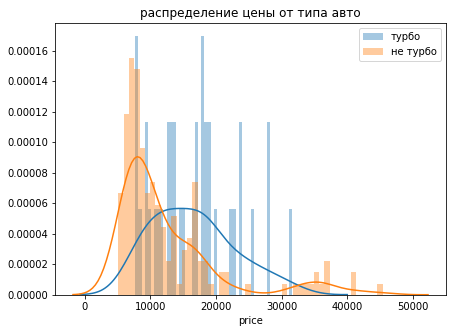

In [77]:
plt.figure(figsize=(7, 5))
sns.distplot(turbo, 50)
sns.distplot(not_turbo, 50)
plt.title('распределение цены от типа авто')
plt.legend(['турбо', 'не турбо'])
plt.show()

Вывод: не достаточно основания для принятия нулевой гипотезы

Н0 - средняя цена на седаны и хэтчбэки не отличается.

In [131]:
sedan = df[df['body-style'] == 'sedan']['price']
hatchback = df[df['body-style'] == 'hatchback']['price']

In [132]:
stats.ttest_ind(sedan, hatchback)

Ttest_indResult(statistic=3.239840854617099, pvalue=0.0014480881997921526)

In [133]:
statistics.mean(sedan)

14299.864583333334

In [134]:
statistics.mean(hatchback)

10542.985714285714

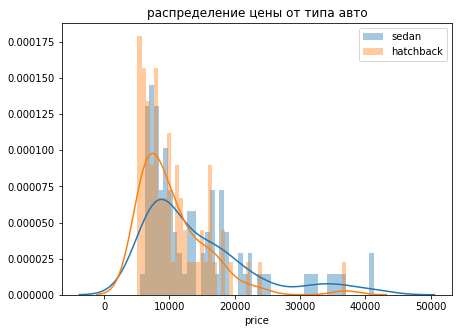

In [135]:
plt.figure(figsize=(7, 5))
sns.distplot(sedan, 50)
sns.distplot(hatchback, 50)
plt.title('распределение цены от типа авто')
plt.legend(['sedan', 'hatchback'])
plt.show()

Вывод: не достаточно основания для принятия нулевой гипотезы